<a href="https://colab.research.google.com/github/Amareteklay/cascades/blob/main/Simulation_py_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook to simulate equations in "Cascading regime shifts" paper

### Using python

#### Use sliders to simulate parameters

In [ ]:
#pip install phaseportrait

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
#import phaseportrait
from scipy.optimize import fsolve
from ipywidgets import interactive, FloatSlider

## 3.1 Cascading shifts between pollution systems
### Equation 5

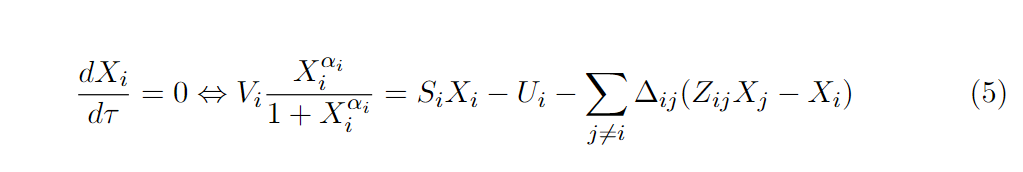

In [ ]:
# Interactive plot
def plot_curves(V, alpha, S, U, delta, Z, Xj):
  def internal_release(x, V, alpha):
    return V * (x ** alpha / (1 + (x ** alpha)))

  def with_dispersion(x, S, U, delta, Z, Xj):
      return S * x - U - delta * (Z * Xj - x)

  def without_dispersion(x, S, U):
      return S * x - U

  # Generate x values
  x_values = np.linspace(0, 3, 200)

  plt.figure(figsize=(6,6))
  # Plot the curves
  plt.plot(x_values, internal_release(x_values, V, alpha), label='Internal release', color='green')
  plt.plot(x_values, with_dispersion(x_values, S, U, delta, Z, Xj), label=f'Net flow with dispersion. Xj = {Xj}', color='orange')
  plt.plot(x_values, without_dispersion(x_values, S, U), label='Net flow without dispersion', color='blue')

  # Add labels and legend
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()

  # Show the plot
  plt.show()

# Define and initialize
V = 5
alpha = 5
S = 0.9
U = 0.2
delta = 0.5
Z = 0.6
Xj = 0.1

# Create sliders
interactive(
    plot_curves,
    V=FloatSlider(min=0, max=5.0, step=0.1, value=V), alpha=FloatSlider(min=2, max=10.0, step=1, value=alpha),
    S=FloatSlider(min=0, max=1.0, step=0.01, value=S), U=FloatSlider(min=0, max=2.0, step=0.1, value=U),
    delta=FloatSlider(min=0, max=2.0, step=0.05, value=delta), Z=FloatSlider(min=0, max=2.0, step=0.05, value=Z),
    Xj=FloatSlider(min=0, max=4.0, step=0.1, value=Xj)
)

interactive(children=(FloatSlider(value=5.0, description='V', max=5.0), FloatSlider(value=5.0, description='al…

I changed the steps of alpha: I think it makes the most sense to use steps of 1 for this one to not have exponents with decimals and the minimum should be 2 below that there is no real curvature and no potential regime shift.
s is a rate so it should be in the interval [0,1], I changed it and used steps of 0.01 instead of 0.1.
u is the human load of pollution. I think it makes sense to not have it above the total stock of pollution.
delta is also a rate so between 0 and 1 and I increase the number of steps slightly
Z is the pollution threshold in the other plot so it should be lower than the total stock x if we want something interesting where threshold can occur. I put the limits between 0 and 2.
Delta is the share of dispersion from a plot over the intrinsic growth rate. So if it is below 1 (our standard) that means that the species grows more than what comes out from the patch through dispersion. If it is larger than 1, that means that more flows out than the growth. Probably only values slightly above 1 are possible if at all.
For Xj I took the same limits as for xi.
I also changed most lower limits to 0 instead of 0.1, It could be tricky if that means dividing by 0 but I don't think it does in this equation and it allows us to test what happens when that parameter is 0 and therefore does not influence the system at all.
I increased the number of steps for x to 200 instead of 100 to get nicer figures in limit cases. I think it still is rather quick.

*For each parameter value we will want to test if changing the parameter value can trigger a regime shift (change how the topological representation of the system changes: is is gradual or are there bifurcations)*

For v for example, we can show when there's only 1 intersection point for low values. After a certain threshold, the green and blue curve intersect three times and for even higher values even the green and orange curves intersect. So there are several steps:
* starting from some initial parameter values, we want to identify these types of bifurcation points for each parameter. Using the same initial values as baseline and only varying one parameter at a time.
* Investigate how these bifurcations may change when varying another parameter at the same time, does the bifurcation come at lower values of the first parameter tested, or at higher values of or does it disappear?
I think it could be interesting to investigate some pairwise comparisons like this.





---




# NEW SECTION


# Animating over varying values of V

I have added the following code that generates an animated series of figures. As V varies from 0 to 6, the green curve changes its shape. We can see the effect on the points where this curve intersects with the other two. I have made V change every second (1000 miliseconds) but you can change the speed by inserting a different value in interval=1000.

This is very nice. I have adapted the x axis (0,4), the limits of V (0,3) and the speed of the animation (100 msec). It would be interesing to see these plots with all the different parameters.

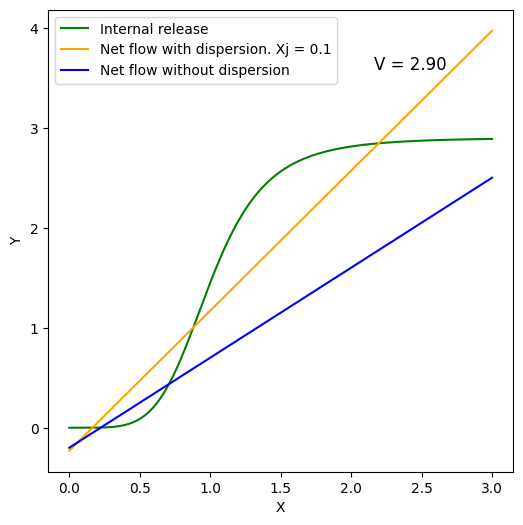

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Function to update the plot with new parameters
def update_plot(frame):
    # Update parameters
    V = frame
    alpha = 5
    S = 0.9
    U = 0.2
    delta = 0.5
    Z = 0.6
    Xj = 0.1

    # Clear previous plot
    plt.clf()

    # Plot the curves with new parameters
    plt.plot(x_values, internal_release(x_values, V, alpha), label='Internal release', color='green')
    plt.plot(x_values, with_dispersion(x_values, S, U, delta, Z, Xj), label=f'Net flow with dispersion. Xj = {Xj}', color='orange')
    plt.plot(x_values, without_dispersion(x_values, S, U), label='Net flow without dispersion', color='blue')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Add text annotation for V value
    plt.text(0.7, 0.9, f'V = {V:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Function to initialize the plot
def init():
    return

# Generate x values
x_values = np.linspace(0, 3, 200)

# Define the internal_release and other functions
def internal_release(x, V, alpha):
    return V * (x ** alpha / (1 + (x ** alpha)))

def with_dispersion(x, S, U, delta, Z, Xj):
    return S * x - U - delta * (Z * Xj - x)

def without_dispersion(x, S, U):
    return S * x - U

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set up the animation
ani = FuncAnimation(fig, update_plot, frames=np.arange(0, 3, 0.1), init_func=init, blit=False, interval=100)

# Display the animation
HTML(ani.to_html5_video())


# Animation over combinations of V and S

Here V and S change and we can see the effects of different combinations of V and S. For each value of V, the blue line shifts based on S.

This is a nice animation too but it becomes hard to see exaclty what is happening. I guess potentially it could be interesting but that would require testing a whole bunch of different parameter values variations. I'm thinking it is maybe more useful to do proper testing with the animations for one parameter variation above. If we do such an animation for each parameter value it is still relatively easy to vary other parameter values in those animations by changing the other parameter values by hand. Perhaps we could get sliders for those too? Or will it become too computationally heavy?

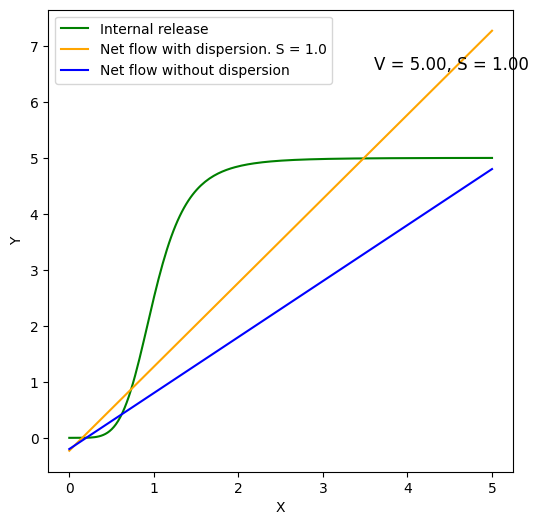

In [ ]:
# Function to update the plot with new parameters
def update_plot(frame):
    # Extract V and S from the grid
    V, S = grid[frame]

    alpha = 5
    U = 0.2
    delta = 0.5
    Z = 0.6
    Xj = 0.1

    # Clear previous plot
    plt.clf()

    # Plot the curves with new parameters
    plt.plot(x_values, internal_release(x_values, V, alpha), label='Internal release', color='green')
    plt.plot(x_values, with_dispersion(x_values, S, U, delta, Z, Xj), label=f'Net flow with dispersion. S = {S}', color='orange')
    plt.plot(x_values, without_dispersion(x_values, S, U), label='Net flow without dispersion', color='blue')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Add text annotation for V and S values
    plt.text(0.7, 0.9, f'V = {V:.2f}, S = {S:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Function to initialize the plot
def init():
    return

# Generate x values
x_values = np.linspace(0, 5, 200)

# Define the internal_release and other functions
def internal_release(x, V, alpha):
    return V * (x ** alpha / (1 + (x ** alpha)))

def with_dispersion(x, S, U, delta, Z, Xj):
    return S * x - U - delta * (Z * Xj - x)

def without_dispersion(x, S, U):
    return S * x - U

# Define the range of values for V and S
V_values = np.linspace(0, 5, 10)  # Example: 10 evenly spaced values from 0 to 5
S_values = np.linspace(0, 1, 5)   # Example: 5 evenly spaced values from 0 to 1

# Create a grid of V and S values
grid = np.array([(V, S) for V in V_values for S in S_values])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set up the animation
ani = FuncAnimation(fig, update_plot, frames=len(grid), init_func=init, blit=False, interval=300)

# Display the animation
HTML(ani.to_html5_video())

## 3.1.1 Application to two plots, pollution model
### Equations 12 and 13
### Phase portrait


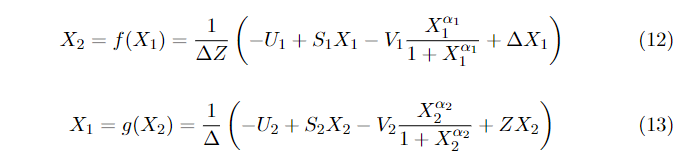

In [ ]:
# Function to generate the plot
def generate_plot(U1, V1, S1, U2, V2, S2, alpha1, alpha2, delta, Z):
    def fx(x1):
        return (1/(delta*Z)) * (-U1 + S1*x1 - V1*(x1**alpha1/(1+x1**alpha1)) + delta*x1)

    def gx(x2):
        return (1/delta) * (-U2 + S2*x2 - V2*(x2**alpha2/ (1+x2**alpha2)) + Z*x2)

    def dx1_dt(x1, x2):
        return -U1 - S1*x1 + V1*(x1**alpha1/(1+x1**alpha1)) + delta*(Z*x2 - x1)

    def dx2_dt(x1, x2):
        return -U2 - S2*x2 + V2*(x2**alpha2/ (1+x2**alpha2)) + delta*(x1 - Z*x2)

    # Solve for points where fx(x1) = 0
    roots_fx = fsolve(fx, [0, 1, 2])

    # Solve for points where gx(x2) = 0
    roots_gx = fsolve(gx, [0, 1, 2])

    # Set up a grid of points in the X1-X2 plane
    x1_vals, x2_vals = np.meshgrid(np.linspace(-1, 3, 20), np.linspace(-1, 3, 20))

    # Compute the derivatives at each point
    dx1_dt_vals = dx1_dt(x1_vals, x2_vals)
    dx2_dt_vals = dx2_dt(x1_vals, x2_vals)

    x_values = np.linspace(0, 3, 1000)
    plt.figure(figsize=(6, 6))

    # Plot the curves
    plt.plot(x_values, fx(x_values), label='Patch1', color='green')
    plt.plot(gx(x_values), x_values, label='Patch2', color='red')

    # Plot points where fx(x1) = 0 and gx(x2) = 0
    plt.scatter(roots_fx, [0]*len(roots_fx), color='blue', marker='o', label='fx(x1) = 0')
    plt.scatter([0]*len(roots_gx), roots_gx, color='orange', marker='o', label='gx(x2) = 0')

    # Add phase portrait vectors
    plt.quiver(x1_vals, x2_vals, dx1_dt_vals, dx2_dt_vals, scale=30, color='grey', width=0.0025, headwidth=3)

    # Add lines at X2=0 and X1=0
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)

    # Add labels and legend
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.legend()

    # Show the plot
    plt.show()

# Define and initialize parameters
U1 = 0.34
V1 = 0.8
S1 = 0.62
U2 = 0.21
V2 = 1.6
S2 = 0.83
alpha1 = 5
alpha2 = 5
delta = 0.15
Z = 0.33

# Create sliders
U1_slider = FloatSlider(value=0.34, min=0, max=5, step=0.01, description='U1:')
V1_slider = FloatSlider(value=0.8, min=0, max=5, step=0.1, description='V1:')
S1_slider = FloatSlider(value=0.62, min=0, max=1, step=0.01, description='S1:')
U2_slider = FloatSlider(value=0.21, min=0, max=5, step=0.01, description='U2:')
V2_slider = FloatSlider(value=1.6, min=0, max=5, step=0.1, description='V2:')
S2_slider = FloatSlider(value=0.83, min=0, max=1, step=0.01, description='S2:')
alpha1_slider = FloatSlider(value=5, min=2, max=10, step=1, description='alpha1:')
alpha2_slider = FloatSlider(value=5, min=2, max=10, step=1, description='alpha2:')
delta_slider = FloatSlider(value=0.15, min=0, max=2, step=0.01, description='delta:')
Z_slider = FloatSlider(value=0.33, min=0, max=2, step=0.01, description='Z:')

# Create interactive plot
interactive_plot = interactive(generate_plot, U1=U1_slider, V1=V1_slider, S1=S1_slider, U2=U2_slider,
                               V2=V2_slider, S2=S2_slider, alpha1=alpha1_slider,  alpha2=alpha2_slider, delta=delta_slider, Z=Z_slider)

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=0.34, description='U1:', max=5.0, step=0.01), FloatSlider(value=0.8, d…

Here I just implemented the same thresholds and steps as in the previous figure. In this one again we want to investigate what changes in parameters can trigger a bifurcation. It would be nice to get the following:
* figures showing different possible numbers of intersection points between these two curves. I will try to find one set of parameter values that give many intersection points and we can have it as a baseline case, changing other parameter values from there to investigate when we get bifurcations. To do that I will have to check the calculations I made in the overleaf file about these threshold values so see if I can calculate some of those with the parameter values we have.
* figures showing the impact of varying each parameter value on the outcome. What are the threshold points for which we get a bifurcation?
* figures showing how these bifurcation points can be influenced bu changing other parameter values.

It turned out that it was easy to get bifurcation points just by varying Delta using the current parameter set up


interactive(children=(FloatSlider(value=0.2, description='U1:', max=5.0, step=0.01), FloatSlider(value=2.0, de…

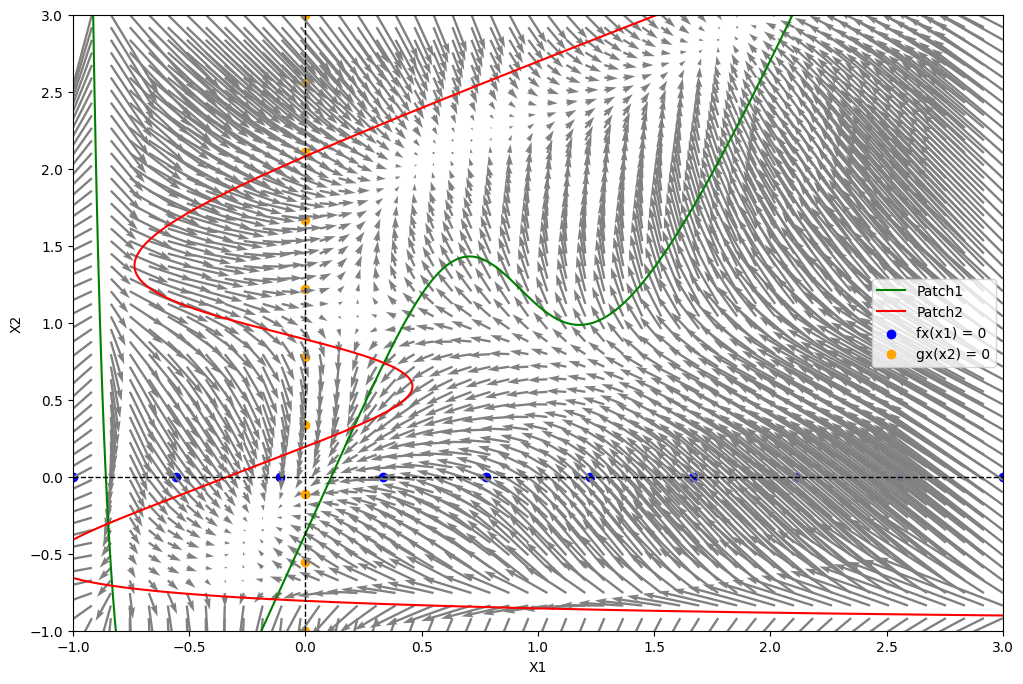

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from ipywidgets import interactive, FloatSlider

# Function to calculate Jacobian matrix for stability analysis
def jacobian_matrix(x1, x2, U1, V1, S1, U2, V2, S2, alpha1, alpha2, delta, Z):
    dfx_dx1 = (S1 - V1 * alpha1 * (x1 ** (alpha1 - 1)) / ((1 + x1 ** alpha1) ** 2)) / (delta * Z) + 1
    dfx_dx2 = -1
    dgx_dx1 = -1
    dgx_dx2 = (S2 - V2 * alpha2 * (x2 ** (alpha2 - 1)) / ((1 + x2 ** alpha2) ** 2)) / delta + Z

    jacobian = np.array([[dfx_dx1, dfx_dx2], [dgx_dx1, dgx_dx2]])
    return jacobian

# Function to generate the plot
def generate_plot(U1, V1, S1, U2, V2, S2, alpha1, alpha2, delta, Z):
    def fx(x1):
        return (1/(delta*Z)) * (-U1 + S1*x1 - V1*(x1**alpha1/(1+x1**alpha1)) + delta*x1)

    def gx(x2):
        return (1/delta) * (-U2 + S2*x2 - V2*(x2**alpha2/ (1+x2**alpha2)) + Z*x2)

    def dx1_dt(x1, x2):
        return -U1 - S1*x1 + V1*(x1**alpha1/(1+x1**alpha1)) + delta*(Z*x2 - x1)

    def dx2_dt(x1, x2):
        return -U2 - S2*x2 + V2*(x2**alpha2/ (1+x2**alpha2)) + delta*(x1 - Z*x2)

    # Use a finer grid for root finding to increase accuracy
    x_guess = np.linspace(-1, 3, 10)

    # Solve for points where fx(x1) = 0
    roots_fx = fsolve(fx, x_guess)

    # Solve for points where gx(x2) = 0
    roots_gx = fsolve(gx, x_guess)

    # Set up a finer grid of points in the X1-X2 plane
    x1_vals, x2_vals = np.meshgrid(np.linspace(-1, 3, 50), np.linspace(-1, 3, 50))

    # Compute the derivatives at each point
    dx1_dt_vals = dx1_dt(x1_vals, x2_vals)
    dx2_dt_vals = dx2_dt(x1_vals, x2_vals)

    x_values = np.linspace(-1, 3, 1000)
    plt.figure(figsize=(12, 8))

    # Plot the curves
    plt.plot(x_values, fx(x_values), label='Patch1', color='green')
    plt.plot(gx(x_values), x_values, label='Patch2', color='red')

    # Plot points where fx(x1) = 0 and gx(x2) = 0
    plt.scatter(roots_fx, [0]*len(roots_fx), color='blue', marker='o', label='fx(x1) = 0')
    plt.scatter([0]*len(roots_gx), roots_gx, color='orange', marker='o', label='gx(x2) = 0')

    # Add phase portrait vectors
    plt.quiver(x1_vals, x2_vals, dx1_dt_vals, dx2_dt_vals, scale=30, color='grey', width=0.0025, headwidth=3)

    # Add lines at X2=0 and X1=0
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)

    # Add labels and legend
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(-1, 3)
    plt.ylim(-1, 3)
    plt.legend()

    # Jacobian and Stability Analysis
    for (x1, x2) in zip(roots_fx, roots_gx):
        jacobian = jacobian_matrix(x1, x2, U1, V1, S1, U2, V2, S2, alpha1, alpha2, delta, Z)
        eigenvalues = np.linalg.eigvals(jacobian)
        stability = 'Stable' if np.all(eigenvalues < 0) else 'Unstable'
        plt.text(x1, x2, f'{stability}', fontsize=10, ha='center', va='center', color='purple')

    # Show the plot
    plt.show()

# Define and initialize parameters
U1 = 0.2
V1 = 2
S1 = 0.9
U2 = 0.3
V2 = 3
S2 = 0.95
alpha1 = 5
alpha2 = 5
delta = 0.9
Z = 0.6

# Create sliders with extended ranges
U1_slider = FloatSlider(value=U1, min=0, max=5, step=0.01, description='U1:')
V1_slider = FloatSlider(value=V1, min=0, max=5, step=0.1, description='V1:')
S1_slider = FloatSlider(value=S1, min=0, max=1, step=0.01, description='S1:')
U2_slider = FloatSlider(value=U2, min=0, max=5, step=0.01, description='U2:')
V2_slider = FloatSlider(value=V2, min=0, max=5, step=0.1, description='V2:')
S2_slider = FloatSlider(value=S2, min=0, max=1, step=0.01, description='S2:')
alpha1_slider = FloatSlider(value=alpha1, min=2, max=10, step=1, description='alpha1:')
alpha2_slider = FloatSlider(value=alpha2, min=2, max=10, step=1, description='alpha2:')
delta_slider = FloatSlider(value=delta, min=0, max=1, step=0.01, description='delta:')
Z_slider = FloatSlider(value=Z, min=0, max=2, step=0.01, description='Z:')

# Create interactive plot
interactive_plot = interactive(generate_plot, U1=U1_slider, V1=V1_slider, S1=S1_slider, U2=U2_slider,
                               V2=V2_slider, S2=S2_slider, alpha1=alpha1_slider, alpha2=alpha2_slider, delta=delta_slider, Z=Z_slider)

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot


## 3.2 Cascading shifts between resource systems
### Equations 25 and 26

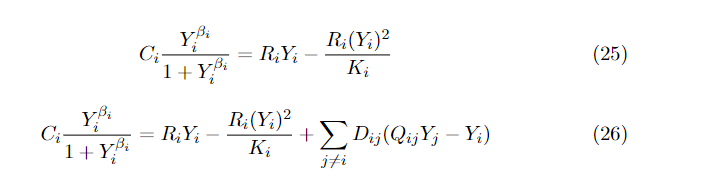

In [ ]:
# Function to generate the plot
def generate_plot(R, K, C, beta, D, Dij):
  def predation(y):
    return (C * y**beta) / (1 + y**beta)

  def growth_without(y):
    return R*y - (R * y**2) / K

  def growth_with(y, Dij, D):
    return R*y - (R * y**2) / K + (D - Dij*y)

  plt.figure(figsize=(12, 10))
  plt.title("Potential equilibria in resource system")
  plt.xlabel("y")
  plt.ylabel("dY/dT")
  plt.xlim(0, 10)
  plt.ylim(0, 3)

  x_values = np.linspace(0, 20, 1000)

  plt.plot(x_values, predation(x_values), label="Predation", color="darkgreen", linewidth=3)
  plt.plot(x_values, growth_without(x_values), label="Growth without dispersion", color="blue", linewidth=3)
  plt.plot(x_values, growth_with(x_values, Dij, D), label=f"Growth with dispersion (D={D}, Dij={Dij})", linewidth=2, color="darkorange")

  plt.legend()
  plt.show()

# Create sliders

R = 0.5
K = 10
C = 0.9
beta = 5
D = 0.02
Dij = 0.06


R_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='R:')
K_slider = FloatSlider(value=10, min=1, max=20, step=0.1, description='K:')
C_slider = FloatSlider(value=0.9, min=0, max=3, step=0.01, description='C:')
beta_slider = FloatSlider(value=5, min=1, max=10, step=1, description='beta:')
D_slider = FloatSlider(value=0.02, min=0, max=20, step=0.01, description='D:')
Dij_slider = FloatSlider(value=0.06, min=0, max=2, step=0.01, description='Dij:')

# Create interactive plot
interactive_plot = interactive(generate_plot, R=R_slider, K=K_slider, C=C_slider, beta=beta_slider, D=D_slider, Dij=Dij_slider)

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='R:', max=1.0, step=0.01), FloatSlider(value=10.0, de…

D=sum DijQijYj and is taken as constant here, which is why Q doesn't enter the formula.Also it is not a rate it is the totalamount of the stock that leaves plot 1 to move to plot j. So the upper limit could be as high as the upper limit for the stock. I'm not sure it makes entire sense but it could in any case be above 1. I adjusted that.
I think it would be good to limit the scale of the vertical axis to 2 or 3 maybe but I don't know how to do that.
My original figures are wrong but it seems that most of the results remain.


# 3.2.1 Application to two plots, resource model
## Equations 33 and 34


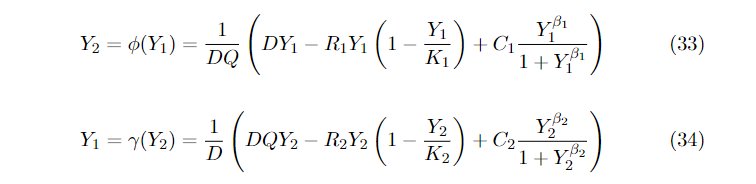

In [ ]:
# Function to generate the plot
def generate_plot(C1, R1, K1, C2, R2, K2, beta1, beta2, delta, Q):
    def fy(y1):
        return (1/(delta*Q)) * (delta*y1 - R1*y1 *(1- y1/K1) + C1*(y1**beta1)/(1+y1**beta1))

    def gy(y2):
        return (1/delta) * (delta*Q*y2 - R2*y2*(1-y2/K2) + C2*(y2**beta2)/(1+y2**beta2))

    def dy1_dt(y1, y2):
        return R1*y1*(1-y1/K1) - C1*(y1**beta1)/(1+y1**beta1) + delta*(Q*y2 - y1)

    def dy2_dt(y1, y2):
        return R2*y2*(1-y2/K2) - C2*(y2**beta2)/(1+y2**beta2) + delta*(y1 - Q*y2)

    # Solve for points where fy(y1) = 0
    roots_fy = fsolve(fy, [0, 1, 2])

    # Solve for points where gy(y2) = 0
    roots_gy = fsolve(gy, [0, 1, 2])

    # Set up a grid of points in the Y1-Y2 plane
    y1_vals, y2_vals = np.meshgrid(np.linspace(0, 12, 20), np.linspace(0, 12, 20))

    # Compute the derivatives at each point
    dy1_dt_vals = dy1_dt(y1_vals, y2_vals)
    dy2_dt_vals = dy2_dt(y1_vals, y2_vals)

    y_values = np.linspace(0, 15, 1000)
    plt.figure(figsize=(6, 6))

    # Plot the curves
    plt.plot(y_values, fy(y_values), label='Plot 1', color='green')
    plt.plot(gy(y_values), y_values, label='Plot 2', color='red')

    # Plot points where fy(y1) = 0 and gy(y2) = 0
    plt.scatter(roots_fy, [0]*len(roots_fy), color='blue', marker='o', label='fy(y1) = 0')
    plt.scatter([0]*len(roots_gy), roots_gy, color='orange', marker='o', label='gy(y2) = 0')

    # Add phase portrait vectors
    plt.quiver(y1_vals, y2_vals, dy1_dt_vals, dy2_dt_vals, scale=30, color='grey', width=0.0025, headwidth=3)

    # Add lines at X2=0 and X1=0
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)

    # Add labels and legend
    plt.xlabel('Y1')
    plt.ylabel('Y2')
    plt.xlim(0, 12.5)
    plt.ylim(0, 12.5)
    plt.legend()

    # Show the plot
    plt.show()

# Create sliders

C1 = 1.9
R1 = 0.74
K1 = 13.3
C2 = 1.9
R2 = 0.74
K2 = 13.3
beta1 = 5
beta2 = 5
delta = 0.1
Q = 0.95


C1_slider = FloatSlider(value=1.9, min=0, max=3, step=0.01, description='C1:')
R1_slider = FloatSlider(value=0.74, min=0, max=1, step=0.01, description='R1:')
K1_slider = FloatSlider(value=13.3, min=0, max=20, step=0.01, description='K1:')
C2_slider = FloatSlider(value=1.9, min=0, max=3, step=0.01, description='C2:')
R2_slider = FloatSlider(value=0.74, min=0, max=1, step=0.01, description='R2:')
K2_slider = FloatSlider(value=13.3, min=0, max=20, step=0.01, description='K2:')
beta1_slider = FloatSlider(value=5, min=1, max=10, step=1, description='beta1:')
beta2_slider = FloatSlider(value=5, min=1, max=10, step=1, description='beta2:')
delta_slider = FloatSlider(value=0.1, min=0, max=1, step=0.01, description='delta:')
Q_slider = FloatSlider(value=0.95, min=0, max=5, step=0.01, description='Q:')

# Create interactive plot
interactive_plot = interactive(generate_plot, C1=C1_slider, R1=R1_slider, K1=K1_slider, C2=C2_slider,
                               R2=R2_slider, K2=K2_slider, beta1=beta1_slider,  beta2=beta2_slider, delta=delta_slider, Q=Q_slider)

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=1.9, description='C1:', max=3.0, step=0.01), FloatSlider(value=0.74, d…

I have verified the calculations in the overleaf file. They were accurate. I have also adapted the parameter values to get reasonable figures. Current parameter values give 9 intersection points. it is easy to vary some values to get 7, 5, 3 or only one intersection point.  
I haven't verified the location of the equilibria in the figures yet.

# 4. Controlling cascades


---



# 4.1. Controlling pollution cascades

## Equation 49

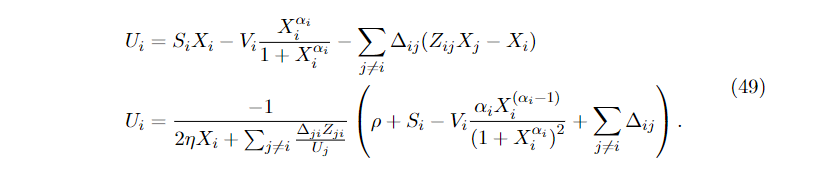

In [ ]:
# Function to generate the plot
def generate_plot(V, a, S, D, Z, Xj, Uj, r, n):
  def pollution_with_dispersion(x):
    return S*x - V * ((x**a)/(1+(x**a))) - D*(Z*Xj - x)

  def pollution_without_dispersion(x):
      return S*x - V * ((x**a)/(1+(x**a)))

  def control_with_dispersion(x):
      return (1/(2*n*x + (D*Z/Uj))) * ((r + S) - (V*(a*(x**(a-1))))/((1+(x**a))**2) + D)

  def control_without_dispersion(x):
      return (1/(2*n*x)) * ((r + S) - (V*(a*(x**(a-1))))/((1+(x**a))**2))

  plt.figure(figsize=(12, 10))
  plt.title("Phase diagram of the controlled pollution system")
  plt.xlabel("Xi")
  plt.ylabel("Ui")
  plt.xlim(-1, 3)
  plt.ylim(-1, 3)
  plt.gca().set_aspect('equal', adjustable='box')

  x_values = np.linspace(0, 3, 1000)

  plt.plot(x_values, pollution_with_dispersion(x_values), label="Pollution with dispersion", color="darkorange", linewidth=2)
  plt.plot(x_values, pollution_without_dispersion(x_values), label="Pollution without dispersion", color="blue", linewidth=2)
  plt.plot(x_values, control_with_dispersion(x_values), label="Control with dispersion", color="red", linewidth=2)
  plt.plot(x_values, control_without_dispersion(x_values), label="Control without dispersion", color="darkgreen", linewidth=2)
  plt.axhline(0, color='black', linestyle='--', linewidth=1)
  plt.axvline(0, color='black', linestyle='--', linewidth=1)
  plt.legend()
  plt.show()

# Create sliders

V = 1
a = 4
S = 0.65
D = 0.05
Z = 0.6
Xj = 0.4
Uj = 0.1
r = 0.03
n = 0.5


V_slider = FloatSlider(value=1, min=0, max=5, step=0.1, description='V:')
a_slider = FloatSlider(value=4, min=1, max=10, step=0.1, description='a:')
S_slider = FloatSlider(value=0.65, min=0, max=1, step=0.01, description='S:')
D_slider = FloatSlider(value=0.05, min=0, max=10, step=0.01, description='D:')
Z_slider = FloatSlider(value=0.6, min=0, max=1, step=0.01, description='Z:')
Xj_slider = FloatSlider(value=0.4, min=-1, max=1, step=0.01, description='Xj:')
Uj_slider = FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Uj:')
r_slider = FloatSlider(value=0.03, min=0, max=1, step=0.01, description='r:')
n_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='n:')

# Create interactive plot
interactive_plot = interactive(generate_plot, V=V_slider, a=a_slider, S=S_slider, D=D_slider, Z=Z_slider, Xj=Xj_slider, Uj=Uj_slider, r=r_slider, n=n_slider)

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='V:', max=5.0), FloatSlider(value=4.0, description='a…

# 4.1.1. Two patches problem
## Equations 52 - 55

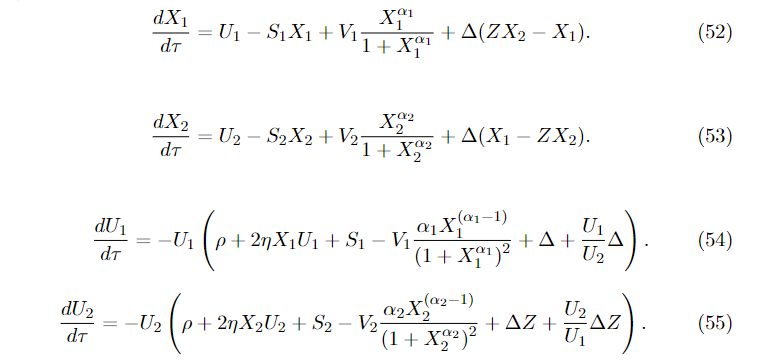

# 4.2. Controlling resource cascades

## Equation 67

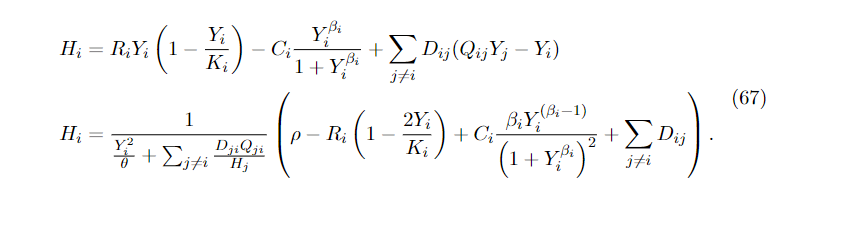

In [ ]:
# Function to generate the plot
def generate_plot(R, b, K, Zij, Dij, C, Yj, Hj, r, t):
  def resource_with_dispersion(y):
    return R*y - (1 - (y/K)) - (C * ((y**b) / (1 + (y**b)))) + (Dij * (Yj - y))

  def resource_without_dispersion(y):
      return R*y - (1 - (y/K)) - (C * ((y**b) / (1 + (y**b))))

  def harvest_with_dispersion(y):
      return (1 / (((y**2) / t) + (Dij / Hj))) * (r - (R * (1 - (2 * y/K))) + (C * (b * (y**(b-1)) / ((1 + (y**b))**2))) + Dij)

  def harvest_without_dispersion(y):
      return (1 / ((y**2) / t)) * (r - (R * (1 - (2 * y/K))) + (C * (b * (y**(b-1)) / ((1 + (y**b))**2))))

  plt.figure(figsize=(14, 10))
  plt.title("Phase diagrams of the controlled resource system")
  plt.xlabel("Yi")
  plt.ylabel("Hi")
  plt.xlim(0, 5)
  plt.ylim(-1, 1)

  x_values = np.linspace(0, 5, 1000)

  plt.plot(x_values, resource_with_dispersion(x_values), label="Resource with dispersion", color="darkorange", linewidth=3)
  plt.plot(x_values, resource_without_dispersion(x_values), label="Resource without dispersion", color="blue", linewidth=3)
  plt.plot(x_values, harvest_with_dispersion(x_values), label="Harvest with dispersion", color="red", linewidth=3)
  plt.plot(x_values, harvest_without_dispersion(x_values), label="Harvest without dispersion", color="darkgreen", linewidth=3)

  plt.legend()
  plt.show()

# Create sliders

R = 0.5
b = 4
K = 10
Zij = 1
Dij = 0.05
C = 0.5
Yj = 9
Hj = 5
r = 0.03
t = 0.1


R_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='R:')
b_slider = FloatSlider(value=4, min=1, max=10, step=0.1, description='b:')
K_slider = FloatSlider(value=10, min=1, max=20, step=0.1, description='K:')
Zij_slider = FloatSlider(value=1, min=0, max=5, step=0.1, description='Zij:')
Dij_slider = FloatSlider(value=0.05, min=0, max=1, step=0.01, description='Dij:')
C_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='C:')
Yj_slider = FloatSlider(value=9, min=0, max=15, step=0.1, description='Yj:')
Hj_slider = FloatSlider(value=5, min=1, max=10, step=0.1, description='Hj:')
r_slider = FloatSlider(value=0.03, min=0, max=1, step=0.01, description='r:')
t_slider = FloatSlider(value=0.1, min=0, max=1, step=0.01, description='t:')

# Create interactive plot
interactive_plot = interactive(generate_plot, R=R_slider, b=b_slider, K=K_slider, Zij=Zij_slider, Dij=Dij_slider, C=C_slider, Yj=Yj_slider, Hj=Hj_slider, r=r_slider, t=t_slider)

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='R:', max=1.0, step=0.01), FloatSlider(value=4.0, des…

# 4.2.1. Two patches problem

## Equations 70 - 73

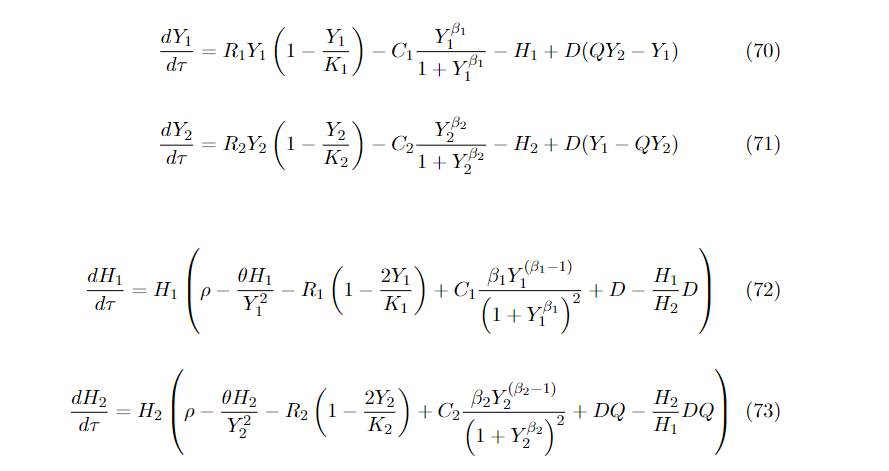